<a href="https://colab.research.google.com/github/gjwnsdud5076/Jun/blob/master/predict_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# object 예측과 crop

test용 jpg / trained weight 업로드하기

In [1]:
rm -rf /content/*

In [2]:
!git clone 'https://github.com/gjwnsdud5076/drug.git'

Cloning into 'drug'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 63 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (63/63), done.


In [3]:
!git clone  'https://github.com/ultralytics/yolov5.git'

Cloning into 'yolov5'...
remote: Enumerating objects: 3319, done.
remote: Total 3319 (delta 0), reused 0 (delta 0), pack-reused 3319
Receiving objects: 100% (3319/3319), 6.50 MiB | 33.62 MiB/s, done.
Resolving deltas: 100% (2216/2216), done.


In [4]:
!pip install -qr '/content/yolov5/requirements.txt'  # install dependencies

     |████████████████████████████████| 276kB 15.2MB/s 


detect.py 바꾸기

In [5]:
! cp '/content/drug/detect (1).py' '/content/yolov5/detect (1).py'

In [6]:
output = !python '/content/yolov5/detect (1).py' --source "/content/drug/test_box/*.jpg" --weights '/content/drug/best.pt' --save-txt
print(output)

["Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='/content/drug/test_box/*.jpg', update=False, view_img=False, weights=['/content/drug/best.pt'])", 'Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079MB)', '', 'Fusing layers... ', 'Model Summary: 232 layers, 7246518 parameters, 0 gradients, 16.8 GFLOPS', 'image 1/1 /content/drug/test_box/test.jpg: 352x640 4 texts, Done. (0.033s)', 'Traceback (most recent call last):', '  File "/content/yolov5/detect (1).py", line 173, in <module>', '    detect()', '  File "/content/yolov5/detect (1).py", line 133, in detect', '    fps = vid_cap.get(cv2.CAP_PROP_FPS)', "AttributeError: 'NoneType' object has no attribute 'get'"]


'Results saved to runs/detect/exp(횟수)', '3 labels saved to runs/detect/exp(횟수)/labels'

crop

In [7]:
path='/content/drug/test_box/test.jpg'
name=path.split("/")[4].split(".")
name=name[0]
print(name)


test


In [8]:
import re
path='/content/runs/detect/exp/labels/test.txt'
myfile=open(path,'r')
lines=myfile.readlines()
pattern= "0"

boxes=[]
for line in lines:
  if re.search(pattern,line):
    Cord_Raw=line
    Cord=Cord_Raw.split( )
    boxes.append(Cord)

print(boxes)

[['0', '94', '161', '137', '208'], ['0', '219', '161', '253', '208'], ['0', '142', '160', '176', '209'], ['0', '182', '161', '215', '208']]


In [9]:
! mkdir /content/drug/crop_img
! mkdir /content/drug/crop_img/S

In [10]:
import cv2
img = cv2.imread("/content/drug/test_box/test.jpg")
cnt = 0
for box in boxes:
    a=box[2] 
    b=box[4]
    c=box[1]
    d=box[3]
    crop_img = img[int(a):int(b), int(c):int(d)]
    cropped_img='/content/drug/crop_img/S/'+name+"_"+str(cnt)+".jpg"
    cv2.imwrite(cropped_img,crop_img)
    cnt += 1


In [11]:
!cp '/content/drug/LeNet5_model.py' 'LeNet5_model.py'

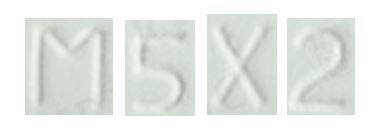

약 정보가 담길 곳 drug_info 
글자, 색상, 모양 순

In [12]:
drug_info=[]

# 글자예측

In [13]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from LeNet5_model import LeNet5_model, Config
#import matplotlib.pyplot as pp


if __name__ == "__main__":
    cfg = Config()

    device = torch.device("cpu")  
    print("device:", device)

    # 모델 생성
    model = LeNet5_model()


    if torch.cuda.is_available():
        model = model.to(device)

    model.eval()

    save_path = "/content/drug/epoch_29.pth"
    checkpoint = torch.load(save_path)
    model.load_state_dict(checkpoint['model_state_dict'])


    classes = ('0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z')
    transforms_test = transforms.Compose([
        transforms.Resize([42, 42]),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

    imgs = ImageFolder('/content/drug/crop_img', transform=transforms_test)
    print("img shape",imgs[0][0].shape)
    print("imgs:", imgs)
    test_loader = DataLoader(imgs, batch_size=1)


    print("test_loader:", test_loader)
    print(test_loader.dataset)
    text = []
    for thisimg, label in test_loader:
        pred = model.forward(thisimg.to(device))
        _, top_pred = torch.topk(pred, k=1, dim=-1)
        top_pred = top_pred.squeeze(dim=1)
        print("--------------------------------------")
        #print("truth:", classes[label])
        print("model prediction:", classes[top_pred])
        text.append(classes[top_pred])

drug_info.append(text)


device: cpu
img shape torch.Size([3, 42, 42])
imgs: Dataset ImageFolder
    Number of datapoints: 4
    Root location: /content/drug/crop_img
    StandardTransform
Transform: Compose(
               Resize(size=[42, 42], interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
test_loader: <torch.utils.data.dataloader.DataLoader object at 0x7f70c0d97240>
Dataset ImageFolder
    Number of datapoints: 4
    Root location: /content/drug/crop_img
    StandardTransform
Transform: Compose(
               Resize(size=[42, 42], interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
--------------------------------------
model prediction: M
--------------------------------------
model prediction: 5
--------------------------------------
model prediction: X
--------------------------------------

# 색상 예측하기

In [14]:
    #src = cv2.imread('black.JPG', cv2.IMREAD_COLOR)
    src = cv2.imread(cropped_img, cv2.IMREAD_COLOR)
    hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    H=h[2][2]*2
    S=s[2][2]/255
    V=v[2][2]/255
    print(H, S, V)
    W = (1 - S)*V*100 #HSV to HWB
    B = (1 - V)*100

    print(H, W, B)

    if (90<=W<=100)|(W+B>=95):
        if  85<=B<=100:
         drug_info.append("black")
        else:
         drug_info.append("white")
    # W+B>=95:
    #   return "gray"
    elif (0<=H<13)|(286<=H<=360):
        if B>=17:
            drug_info.append("자주색")
        elif (B<30)&(W>35):
            drug_info.append("pink")
        else: drug_info.append("red")
    elif 13<=H<28:
        drug_info.append("orange")
    elif 28<=H<63:
        drug_info.append("yellow")
    elif 63<=H<163:
        if B>=30:
            drug_info.append("green")
        else:
            drug_info.append("연두색")
    elif 163<=H<172:
        drug_info.append("청록색")
    elif 172<=H<260:
        if B>=41:
            drug_info.append("남색")
        else:
            drug_info.append("blue")
    elif 260<=H<286:
        drug_info.append("purple")

    else:
        drug_info.append("error")


132 0.043137254901960784 0.8784313725490196
132 84.05382545174933 12.15686274509804


In [15]:
print(drug_info)

[['M', '5', 'X', '2'], 'white']


# 모양 예측하기

In [16]:
!mkdir shape
!mkdir shape/exp
!cp  '/content/drug/test_box/test.jpg' 'shape/exp/test.jpg'

In [17]:
! cp '/content/drug/LeNet5_model_shape.py' 'LeNet5_model_shape.py'

In [18]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from LeNet5_model_shape import LeNet5_model, Config
import cv2
from os import listdir
from os.path import isfile, join
import numpy

if __name__ == "__main__":
    cfg = Config()

    device = torch.device("cpu")
    print("device:", device)

    # 모델 생성
    model = LeNet5_model()

    model.eval()

    save_path = "/content/drug/epoch_36.pth"
    checkpoint = torch.load(save_path)
    model.load_state_dict(checkpoint['model_state_dict'])


    classes = ('circle', 'diamond', 'hexagon6', 'number8', 'octagon', 'oval', 'ovlong', 'pentagon5', 'rectangle', 'triangle')

    transforms_test = transforms.Compose([
        transforms.Resize([78,42]),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])


    imgs = ImageFolder('/content/shape/', transform=transforms_test)
    print("img shape",imgs[0][0].shape)
    print("imgs:", imgs)
    test_loader = DataLoader(imgs, batch_size=1)


    print("test_loader:", test_loader)
    print(test_loader.dataset)

    for thisimg, label in test_loader:
        pred = model.forward(thisimg.to(device))
        _, top_pred = torch.topk(pred, k=1, dim=-1)
        top_pred = top_pred.squeeze(dim=1)
        print("--------------------------------------")
        print("model prediction:", classes[top_pred])
        drug_info.append(classes[top_pred])



device: cpu
img shape torch.Size([3, 78, 42])
imgs: Dataset ImageFolder
    Number of datapoints: 1
    Root location: /content/shape/
    StandardTransform
Transform: Compose(
               Resize(size=[78, 42], interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
test_loader: <torch.utils.data.dataloader.DataLoader object at 0x7f70c0d97518>
Dataset ImageFolder
    Number of datapoints: 1
    Root location: /content/shape/
    StandardTransform
Transform: Compose(
               Resize(size=[78, 42], interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
--------------------------------------
model prediction: oval


# 결과

In [19]:
print(drug_info)

[['M', '5', 'X', '2'], 'white', 'oval']


# 데이터 연결 예제

In [20]:
d=[]
d.append(['가나모티정',[['R','Y','G','M'], 'white', 'oval']])
d.append(['모사메드에스알정',[['M','X'], '분홍색', 'oval']])
d.append(['그리맥스서방정',[['M', 'X', '2', '5'], 'white', 'oval']])
d.append(['노이탐정',[['B','M','2','5'], 'white', 'circle']])
print(d)

[['가나모티정', [['R', 'Y', 'G', 'M'], 'white', 'oval']], ['모사메드에스알정', [['M', 'X'], '분홍색', 'oval']], ['그리맥스서방정', [['M', 'X', '2', '5'], 'white', 'oval']], ['노이탐정', [['B', 'M', '2', '5'], 'white', 'circle']]]


In [21]:
#약물예측
#글자속에 이 글자 있나 찾기.
text=drug_info[0]
text_score=[0,0,0,0]
nt_score=[0,0,0,0]
# text score 찾기
for y in range(4):
    d_text=d[y][1][0]
    for x in range(len(text)):
        if text[x] in d_text:
            text_score[y]+=1
#print(text_score)
# 모양, 색깔 score 찾기
for y in range(4):
    if d[y][1][1]==drug_info[1]:
        nt_score[y]+=1
    if d[y][1][2]==drug_info[2]:
        nt_score[y]+=1
#print(nt_score)

score= text_score+ nt_score

print("The drug you're looking for is...")
index=score.index(max(score))
print(d[score.index(max(score))][0])



The drug you're looking for is...
그리맥스서방정


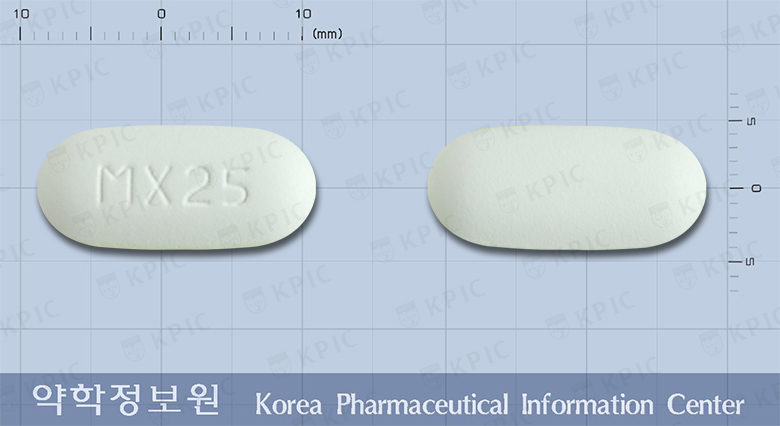